In [ ]:
# Import Libraries for Analysis
import os
import pandas as pd
import numpy as np
import openpyxl as pyx

In [36]:
# Import Libararies for Visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Use Windows Installed fonts for rendering devnaagri text
plt.rcParams['font.family'] = ['Nirmala UI']
plt.rcParams['axes.unicode_minus'] = False

In [38]:
# Import Langchain Specific Libraries
from langchain.agents import initialize_agent
from langchain.agents.agent_types import AgentType
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.tools import tool
from langchain_core.prompts import ChatPromptTemplate

In [2]:
df = pd.read_excel("Data\TransactionReport14.07.2025 .xls")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\athar\AppData\Local\Temp\ipykernel_24076\915307105.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_excel("Data\TransactionReport14.07.2025 .xls")
d:\SandBox\DA_Agent\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
#normalizing columns
df.columns = [col.strip(" ").replace(" ", "_").lower() for col in df.columns]
df.columns

Index(['name_of_dam', 'धरणाचे_नाव', 'lake_level_reading(rl)',
       'lake_level_reading_date_/_time', 'live_storage_(mcum)',
       'live_storage_(tmc)', 'gross_storage_(mcum)', 'gross_storage_(tmc)',
       'last_year_date/time', 'last_year_live_storage_(mcum)',
       'last_year_live_storage_(tmc)', 'live_storage/designed_live_storage_%',
       'last_year's_live_storage/designed_live_storage_%',
       'designed_live_storage_(mcum)', 'designed_live_storage_(tmc)',
       'designed_dead_storage_(mcum)', 'designed_dead_storage_(tmc)',
       'designed_gross_storage_(mcum)', 'designed_gross_storage_(tmc)',
       'purpose_of_dam', 'धरणाचा_प्रकार', 'project_type', 'प्रकल्पाचा_प्रकार',
       'name_of_project', 'प्रकल्पाचे_नाव', 'project_status',
       'प्रकल्पाची_सद्यस्थिती', 'status_of_storage_creation_of_dam',
       'धरणाचा_पाणीसाठा_निर्माण_करण्याची_सद्यस्थिती', 'type_of_reservoir',
       'जलाशयाचा_प्रकार', 'revenue_region', 'प्रदेश', 'district', 'जिल्हा',
       'taluka', 'तालुका

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   name_of_dam                                       2997 non-null   object 
 1   धरणाचे_नाव                                        2997 non-null   object 
 2   lake_level_reading(rl)                            2997 non-null   float64
 3   lake_level_reading_date_/_time                    2997 non-null   object 
 4   live_storage_(mcum)                               2997 non-null   float64
 5   live_storage_(tmc)                                2997 non-null   float64
 6   gross_storage_(mcum)                              2997 non-null   float64
 7   gross_storage_(tmc)                               2997 non-null   float64
 8   last_year_date/time                               2997 non-null   object 
 9   last_year_live_stor

In [5]:
df.head()

,name_of_dam,धरणाचे_नाव,lake_level_reading(rl),lake_level_reading_date_/_time,live_storage_(mcum),live_storage_(tmc),gross_storage_(mcum),gross_storage_(tmc),last_year_date/time,last_year_live_storage_(mcum),...,मंडळ,division,विभाग,gated/non-gated,latitude,longitude,remark,lake_level_entry_source,data_entered_by,reading_updated_date_&_time
0,Aadale M.I.,आडाळे ल पा तलाव,97.40,14/07/2025 07:15 AM,0.970,0.03425,1.360,0.04802,"14/07/2024, 06:37 AM",0.540,...,"अधीक्षक अभियंता, पुणे पाटबंधारे मंडळ, पुणे","Executive Engineer, Pune Irrigation Division -...","कार्यकारी अभियंता, पुणे पाटबंधारे विभाग, पुणे",Non-Gated,18.66,73.63,NaN,WEB,de1kcsd2_pune,"14/07/2025, 07:15 AM"
1,Aad M. I. Tank,आड ल पा तलाव,108.10,08/07/2025 10:57 AM,1.137,0.04015,1.159,0.04092,"05/07/2024, 12:21 AM",0.174,...,"अधीक्षक अभियंता, ठाणे पाटबंधारे मंडळ, ठाणे","Executive Engineer, Minor Irrigation Division ...","कार्यकारी अभियंता, लघु पाटबंधारे विभाग, नाशिक",Non-Gated,20.21,73.6,NaN,Mobile,de1micsd_trmbk,"08/07/2025, 10:57 AM"
2,Aadwadi K.T. Weir,आडवाडी को प बंधारा,63.28,07/07/2025 08:10 AM,0.010,0.00035,0.010,0.00035,"08/04/2024, 07:39 AM",0.000,...,"अधीक्षक अभियंता, पुणे पाटबंधारे मंडळ, पुणे","Executive Engineer, Lift Irrigation Management...","कार्यकारी अभियंता, उपसा सिंचन व्यवस्थापन विभाग...",Non-Gated,0,0,NaN,Mobile,de1plimsd_sasvd,"07/07/2025, 08:10 AM"
3,Aaland M. I.,आळंद ल पा तलाव,265.15,01/03/2024 08:00 AM,0.537,0.01896,0.613,0.02165,"01/03/2024, 08:00 AM",0.537,...,"अधीक्षक अभियंता व प्रशासक, लाभ क्षेत्र विकास प...","Executive Engineer, Chhatrapati Sambhajinagar ...","कार्यकारी अभियंता, छत्रपती संभाजीनगर पाटबंधारे...",Non-Gated,20.48,75.27,NaN,Mobile,fc1aid_abad,"06/03/2024, 08:00 AM"
4,Abhalwadi KT Weir,आभाळवाडी को प बंधारा,97.60,08/10/2023 08:16 PM,0.000,0.00000,0.000,0.00000,"08/10/2023, 07:46 PM",0.000,...,"अधीक्षक अभियंता व प्रशासक, लाभक्षेत्र विकास प्...","Executive Engineer, Ahilyanagar Irrigation Div...","कार्यकारी अभियंता, अहिल्यानगर पाटबंधारे विभाग,...",Non-Gated,0,0,NaN,Mobile,jc7aid_amngr,"14/10/2023, 07:46 PM"


In [ ]:
from langchain.tools import tool

@tool
def query_dataframe(code: str) -> dict:
    """Executes Python code on the dataframe `df` and returns result + code."""
    global df
    try:
        # Eval the result
        result = eval(code)
        result = result.loc[:, ~result.columns.duplicated()]
        # Convert
        #   result to JSON or string if it's a DataFrame
        if isinstance(result, pd.DataFrame):
            return {
                "type": "dataframe",
                "code": code,
                "data": result.to_json(orient="records")  # Or .to_dict()
            }
        else:
            return {
                "type": "other",
                "code": code,
                "data": str(result)
            }

    except Exception as e:
        return {
            "type": "error",
            "code": code,
            "data": f"Error: {e}"
        }



In [43]:
@tool
def visualize_data(code: str):
    """
    Draws the visualization of a specific query and draws it using seaborn. Saves the visualization to a file and returns the image path.
    """
    global df

    image_filename = "seaborn_plot.png"
    image_path = os.path.join("plots", image_filename)

    try:
        print("Generated Code: ", code)
        exec(code)
        fig = plt.gcf()
        os.makedirs("plots", exist_ok=True)
        fig.savefig(image_path, bbox_inches='tight', dpi=300) # dpi for higher resolution
        plt.close(fig)
        print(f"Visualization saved to: {image_path}")
        return image_path

    except Exception as e:
        print(f"Error during visualization or saving: {e}")
        return None

In [44]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")

In [63]:
columns = df.columns
system_prompt = f"""
    You are a Data Analysis Agent which Analyzes the Pandas Dataframe and provide with the insights and Visualization tools. and tells your findings honestly

    You have tool like:
    query_dataframe -> which allows you to query the pandas dataframe using code and provide with the insights
    visualize_data -> which provide you with the seaborn visualization

    Columns of the datafraee are : {columns}

If not explicitly asked by user do not use any tools
"""

In [64]:
llm = ChatGoogleGenerativeAI(temperature=0, model="gemini-2.5-flash")  # or GPT-3.5 if needed

tools = [query_dataframe, visualize_data]

agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    system_prompt = system_prompt,
    verbose=True
)


In [ ]:
# query = "Show me the top 5 rows where lake_level_reading(rl) are greater than 90. just provide its name and location columns"
query = "What is the Total Live Storage (tmc) of all dams in district Jalgaon"
result = agent.run(query)
print(result)



> Entering new AgentExecutor chain...
Action: query_dataframe
Action Input: df[df['District'] == 'Jalgaon']['Live Storage (tmc)'].sum()

Genrated Code:  df[df['District'] == 'Jalgaon']['Live Storage (tmc)'].sum()

Observation: Error: 'District'
Thought:Action: query_dataframe
Action Input: df.columns

Genrated Code:  df.columns
<class 'pandas.core.indexes.base.Index'>

Observation: Index(['name_of_dam', 'धरणाचे_नाव', 'lake_level_reading(rl)',
       'lake_level_reading_date_/_time', 'live_storage_(mcum)',
       'live_storage_(tmc)', 'gross_storage_(mcum)', 'gross_storage_(tmc)',
       'last_year_date/time', 'last_year_live_storage_(mcum)',
       'last_year_live_storage_(tmc)', 'live_storage/designed_live_storage_%',
       'last_year's_live_storage/designed_live_storage_%',
       'designed_live_storage_(mcum)', 'designed_live_storage_(tmc)',
       'designed_dead_storage_(mcum)', 'designed_dead_storage_(tmc)',
       'designed_gross_storage_(mcum)', 'designed_gross_storage_(tmc)'

In [66]:
query = "Show me the top 5 rows where lake_level_reading(rl) are greater than 90. just provide its name and location columns"
# query = "Draw the Visusalization of live storage(tmc) for all dams in Jalgaon"
result = agent.run(query)
print(result)



> Entering new AgentExecutor chain...
Action: query_dataframe
Action Input: df[df['lake_level_reading(rl)'] > 90][['name', 'location']].head(5)

Genrated Code:  df[df['lake_level_reading(rl)'] > 90][['name', 'location']].head(5)

Observation: Error: "None of [Index(['name', 'location'], dtype='object')] are in the [columns]"
Thought:Action: query_dataframe
Action Input: df.columns

Genrated Code:  df.columns
<class 'pandas.core.indexes.base.Index'>

Observation: Index(['name_of_dam', 'धरणाचे_नाव', 'lake_level_reading(rl)',
       'lake_level_reading_date_/_time', 'live_storage_(mcum)',
       'live_storage_(tmc)', 'gross_storage_(mcum)', 'gross_storage_(tmc)',
       'last_year_date/time', 'last_year_live_storage_(mcum)',
       'last_year_live_storage_(tmc)', 'live_storage/designed_live_storage_%',
       'last_year's_live_storage/designed_live_storage_%',
       'designed_live_storage_(mcum)', 'designed_live_storage_(tmc)',
       'designed_dead_storage_(mcum)', 'designed_dead_stor

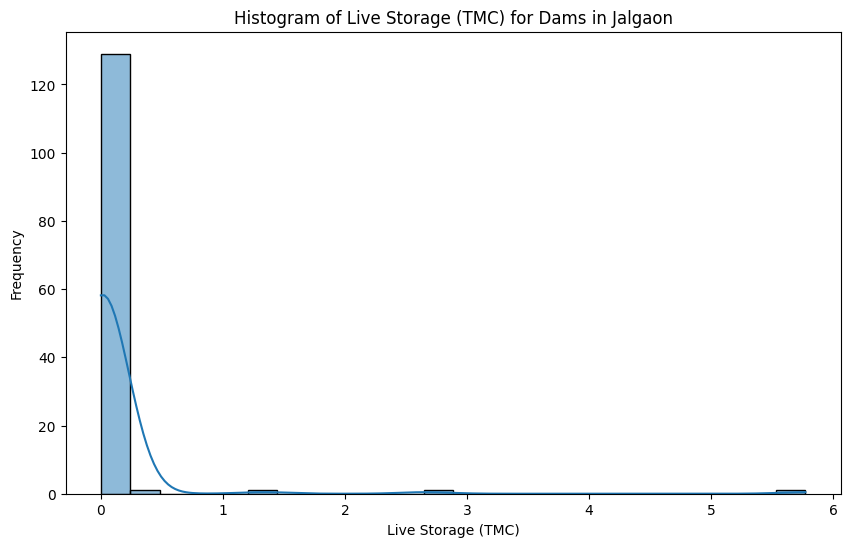

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['district'] == 'Jalgaon']['live_storage_(tmc)'], kde=True)
plt.title('Histogram of Live Storage (TMC) for Dams in Jalgaon')
plt.xlabel('Live Storage (TMC)')
plt.ylabel('Frequency')
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_24076\508642437.py:10: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\athar\AppData\Local\Temp\ipykernel_24076\508642437.py:10: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\athar\AppData\Local\Temp\ipykernel_24076\508642437.py:10: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\athar\AppData\Local\Temp\ipykernel_24076\508642437.py:10: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\athar\AppData\Local\Temp\ipykernel_24076\508642437.py:10: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\athar\AppData\Local\Temp\ipykernel_24076\508642437.py:10: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) De

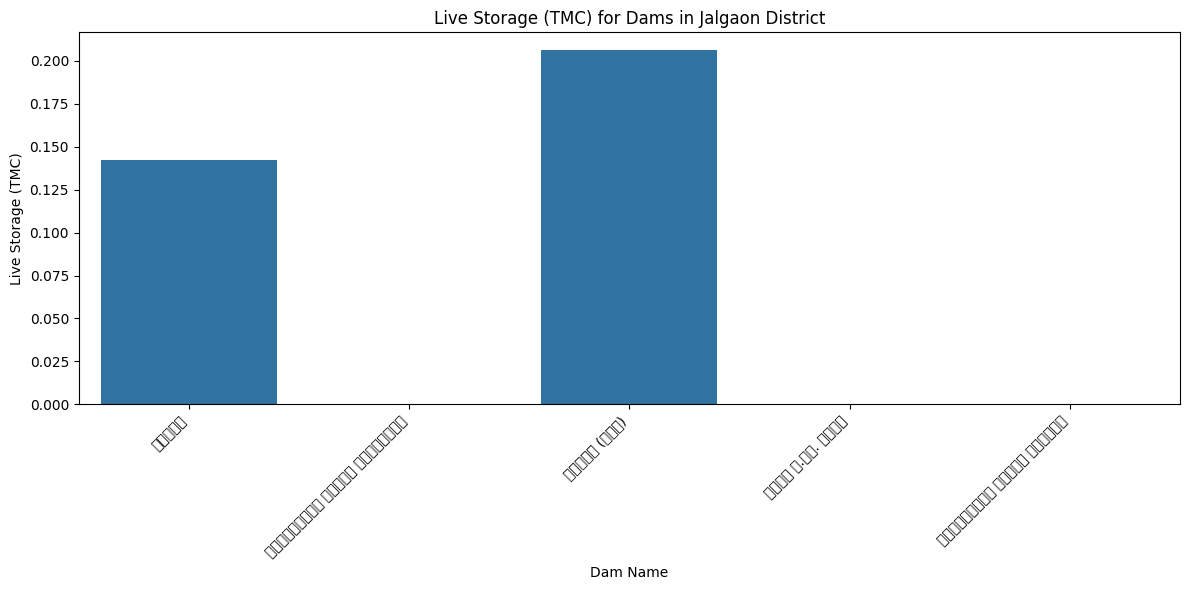

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
jalgaon_dams = df[df['district'] == 'Jalgaon'].iloc[:5, :]
plt.figure(figsize=(12, 6))
sns.barplot(x='धरणाचे_नाव', y='live_storage_(tmc)', data=jalgaon_dams)
plt.title('Live Storage (TMC) for Dams in Jalgaon District')
plt.xlabel('Dam Name')
plt.ylabel('Live Storage (TMC)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [55]:
code = """import seaborn as sns
import matplotlib.pyplot as plt
df_jalgaon = df[df['district'] == 'Jalgaon'].iloc[:5, :]
plt.figure(figsize=(10, 6))
sns.barplot(x='name_of_dam', y='live_storage_(tmc)', data=df_jalgaon)
plt.title('Live Storage (TMC) for Dams in Jalgaon District')
plt.xlabel('Dam Name')
plt.ylabel('Live Storage (TMC)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()"""

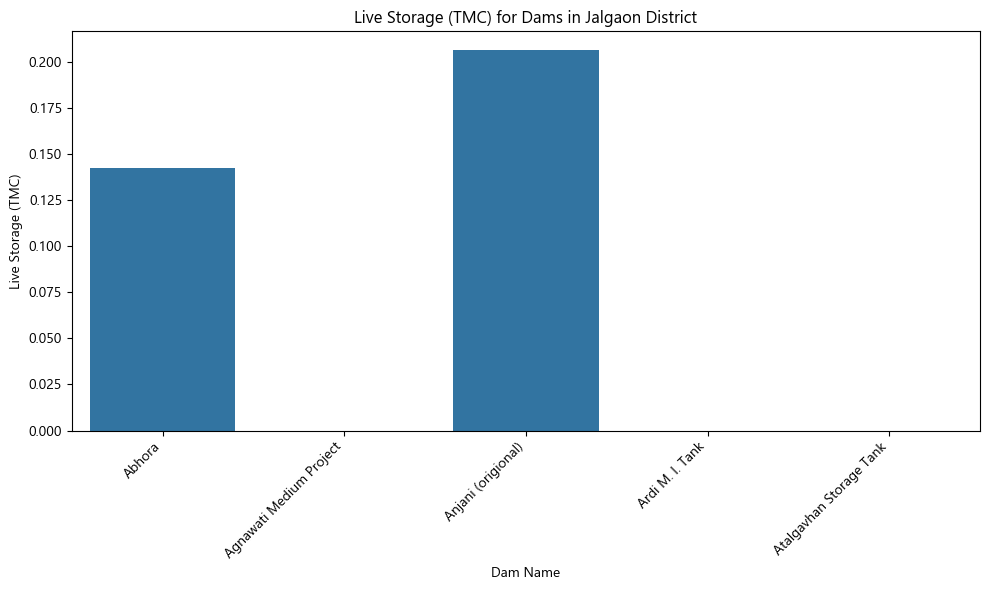

Visualization saved to: plots\seaborn_plot.png
plots\seaborn_plot.png


In [ ]:
image_filename = "seaborn_plot.png"
image_path = os.path.join("plots", image_filename)

try:
    exec(code)
    fig = plt.gcf()
    os.makedirs("plots", exist_ok=True)
    fig.savefig(image_path, bbox_inches='tight', dpi=300)
    plt.close(fig)
    print(f"Visualization saved to: {image_path}")
    print(image_path)
except Exception as e:
    print(f"Error during visualization or saving: {e}")
    print("None")

In [ ]:
from langchain_core.messages import HumanMessage
import base64

# Download and encode the image
with open(r"D:\SandBox\DA_Agent\plots\image.png", 'rb') as f:
    image_data = base64.b64encode(f.read()).decode("utf-8")

# Create a message with the image
message = HumanMessage(
    content=[
        {"type": "text", "text": "analyze the chart from this image"},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image_data}"},
        },
    ],
)

In [73]:

# Invoke the model with the message
response = llm.invoke([message])

# Print the model's response
print(response.content)

This bar chart, titled "Live Storage (TMC) for Dams in Jalgaon District," illustrates the current live water storage in Thousand Million Cubic feet (TMC) for five specific dams located in the Jalgaon District.

Here's an analysis of the chart:

1.  **Overall Purpose:** The chart provides a snapshot of the usable water levels in key dams within the Jalgaon District, measured in TMC.

2.  **Dams Included:** The chart displays data for five dams:
    *   Abhora
    *   Agnawati Medium Project
    *   Anjani (origional)
    *   Ardi M. I. Tank
    *   Atalgavhan Storage Tank

3.  **Live Storage Levels:**
    *   **Anjani (origional):** This dam has the highest live storage, reaching **0.200 TMC**. This is the maximum value shown on the Y-axis.
    *   **Abhora:** This dam has the second-highest live storage, approximately **0.143 TMC** (visually estimated between 0.125 and 0.150).
    *   **Agnawati Medium Project:** This dam shows **0.000 TMC** live storage, meaning it currently holds no 